In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from helpers import *
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.io import loadmat, savemat
from math import floor, ceil

In [4]:
x = loadmat('full_grid_baseline_zscored.mat')

In [60]:
e105 = x['data'][:, 104]

In [43]:
b7, s7, bd7 = autocorr_width(e105, 1500, 300, mode = 'sliding')
b3, s3, bd3 = autocorr_width(e105, 3000, 300, mode = 'sliding')
b6, s6, bd6 = autocorr_width(e105, 6000, 300, mode = 'sliding')

In [38]:
b7, s7, bd7 = autocorr_width(e105, 1500, 300, mode = 'sliding')

In [61]:
e105.size

94735

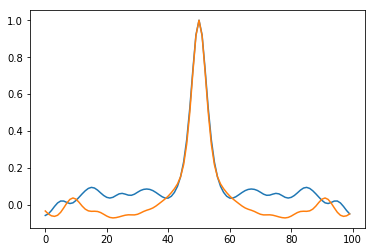

In [37]:
plt.plot(bd3[1450:1550]/np.max(bd3))
plt.plot(bd7[1450:1550]/np.max(bd7))

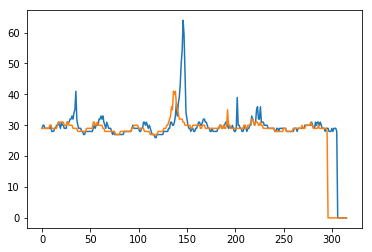

In [45]:
plt.plot(b3)
plt.plot(b6)
#plt.plot(b7)

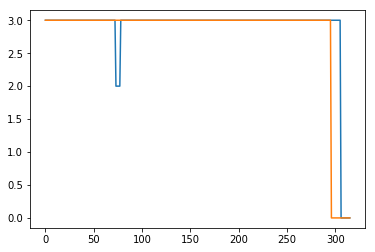

In [49]:
plt.plot(s3)
plt.plot(s6)

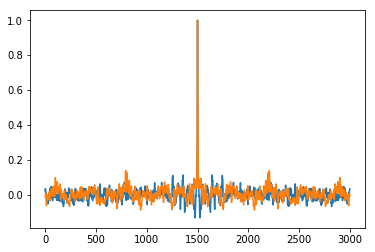

In [33]:
plt.plot(bd6[::2]/np.max(bd6))
plt.plot(bd3/np.max(bd3))

In [13]:
b4, s4, bd4 = autocorr_width(e105, 300, 1, mode = 'sliding')

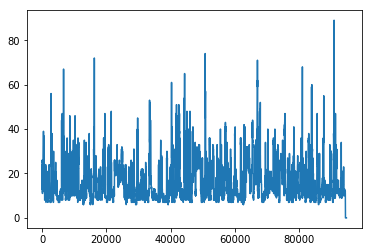

In [14]:
plt.plot(b4)

In [16]:
b5, s5, bd5 = autocorr_width(e105, 300, 1, mode = 'sliding')

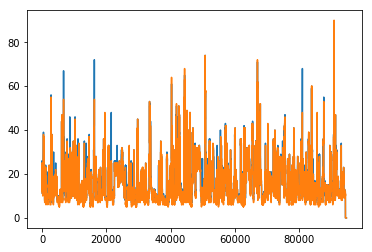

In [17]:
plt.plot(b4)
plt.plot(b5)

In [50]:
b10, s10, bd10 = autocorr_width(e105, 6000, 10, mode = 'sliding')

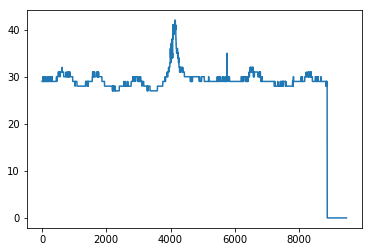

In [51]:
plt.plot(b10)

In [5]:
e118 = x['data'][:, 118]

In [10]:
a, s, ad = autocorr_width(e118, 3000, 300, 50, 0.005, mode = 'sliding')
a2, s2, ad2 = autocorr_width(e118, 300, 300, 50, 0.005, mode = 'sliding' )

Warning! Either expand window size or increase threshold


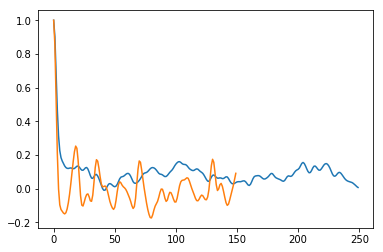

In [14]:
plt.plot(ad[floor(ad.size/2):floor(ad.size/2 + ad2.size/2) + 100]/max(ad))
plt.plot(ad2[floor(ad2.size/2):]/max(ad2))

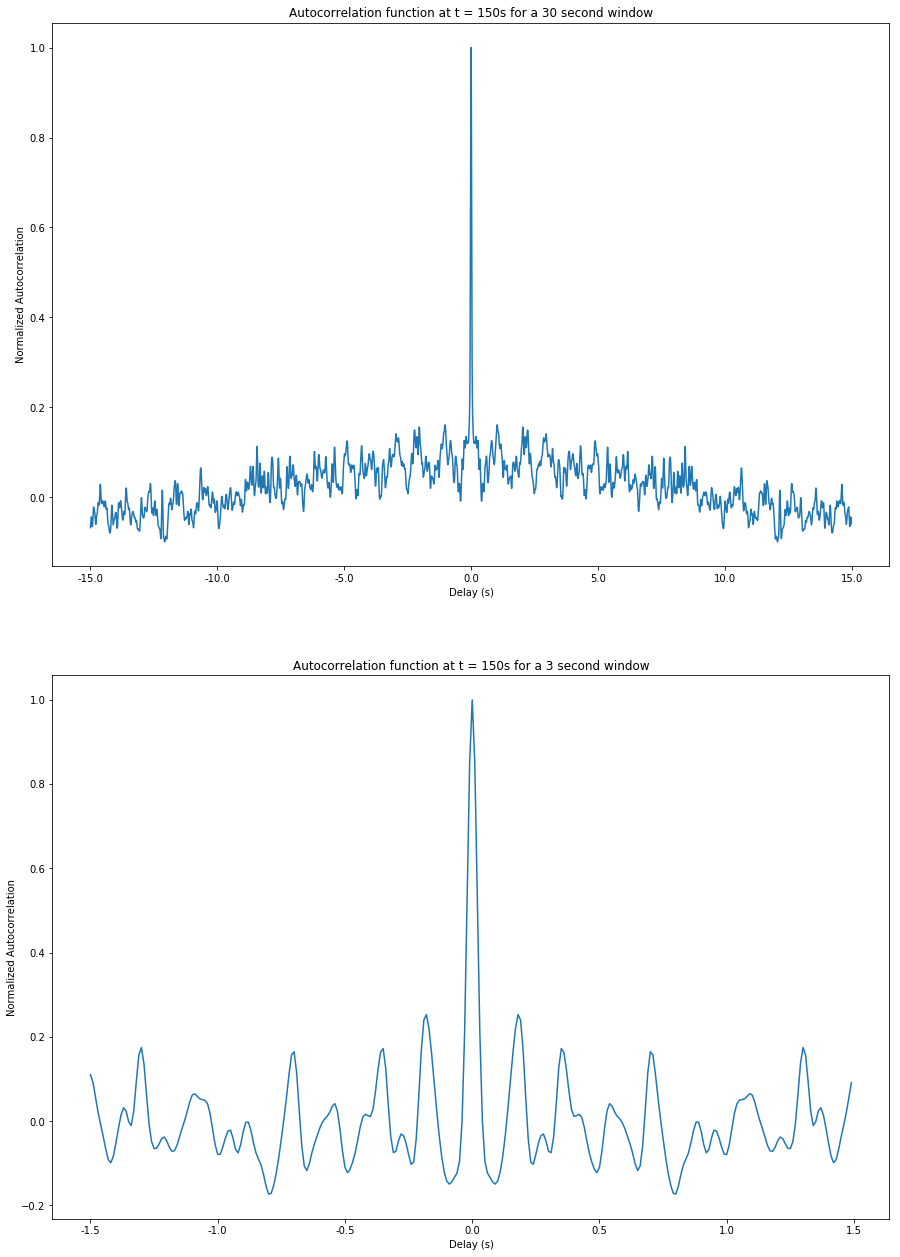

In [20]:
fig = plt.figure(figsize = (15, 22))
a = fig.add_subplot(211)

plt.plot(ad/max(ad))
plt.title('Autocorrelation function at t = 150s for a 30 second window')
xticks = a.get_xticks().tolist()
xticks[:] = [(t - 1500)/100 for t in xticks]
a.set_xticklabels(xticks)
plt.xlabel('Delay (s)')
plt.ylabel('Normalized Autocorrelation')

a = fig.add_subplot(212)

plt.plot(ad2/max(ad2))
plt.title('Autocorrelation function at t = 150s for a 3 second window')
xticks = a.get_xticks().tolist()
xticks[:] = [(t - 150)/100 for t in xticks]
a.set_xticklabels(xticks)
plt.xlabel('Delay (s)')
plt.ylabel('Normalized Autocorrelation')

plt.savefig('Figures/092418/raw_autocorr2.png')

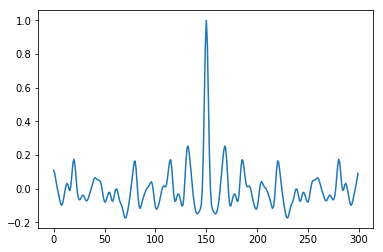

In [16]:
plt.plot(ad2/max(ad2))